In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("data/Vibration dataset vs. wind speed/twsist faut when Vw=2.xlsx")

In [3]:
arr = data.iloc[:,1].values

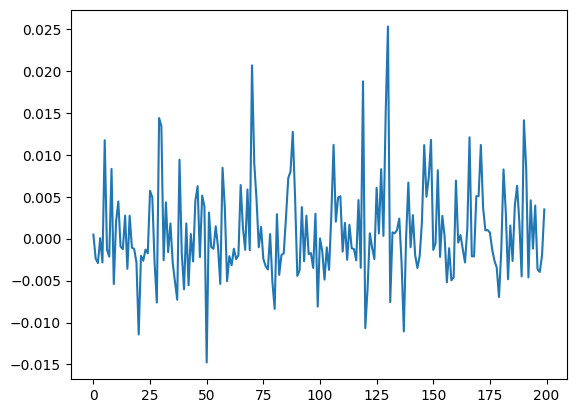

In [4]:
import matplotlib.pyplot as plt 

plt.figure() 
plt.plot(arr[:200])
plt.show()

In [5]:
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.signal import periodogram
import pywt

def extract_features(segment, Vw, fs=1000):
    features = []
    #Toc do gio
    features.append(Vw)
    # Ensure segment is numpy array
    segment = np.array(segment)
    
    # --- Dac trung mien thoi gian  ---
    features.append(np.mean(segment))                          # Mean
    features.append(np.sum(segment**2))                        # Energy
    # Advanced time-domain features
    mean_abs = np.mean(np.abs(segment))
    rms = np.sqrt(np.mean(segment**2))
    peak = np.max(np.abs(segment))
    sqrt_abs = np.mean(np.sqrt(np.abs(segment)))
    features.append(peak / rms)                                # Crest Factor
    features.append(rms / mean_abs)                            # Shape Factor
    features.append(peak / mean_abs)                           # Impulse Factor
    features.append(peak / (sqrt_abs**2 + 1e-12))              # Margin Factor

    # --- Dac trung mien tan so ---
    f, Pxx = periodogram(segment, fs=fs)
    peak_frequency = f[np.argmax(Pxx)]
    features.append(peak_frequency)
    
    low_freq_energy = np.sum(Pxx[(f < 50)])  # Energy below 50 Hz
    features.append(low_freq_energy)
    
    features.append(-np.sum(Pxx*np.log(Pxx + 1e-12)))           # Spectral Entropy
    
    spectral_flatness = np.exp(np.mean(np.log(Pxx + 1e-12))) / (np.mean(Pxx) + 1e-12)
    
    features.append(spectral_flatness)                          # Spectral Flatness
    # 1. Zero Crossing Rate (ZCR)
    zero_crossings = np.sum(np.diff(np.sign(segment)) != 0)
    features.append(zero_crossings / len(segment))
    # 2. Mean Frequency
    mean_frequency = np.sum(f * Pxx) / (np.sum(Pxx) + 1e-12)
    features.append(mean_frequency)
    # 3. Frequency Variance
    freq_variance = np.sum(((f - mean_frequency)**2) * Pxx) / (np.sum(Pxx) + 1e-12)
    features.append(freq_variance)
    return features


In [6]:
def slipt_segment(arr,Vw, fs, segment_length,overlap):
   
    arr_filter = arr
    
    segments_ft = []
    step = int(segment_length * (1 - overlap))
    step = max(1, step)
    num_segments = (len(arr_filter) - segment_length) // step + 1

    #Chia segment + trich xuat
    for j in range(num_segments):
        start = j * step
        end = start + segment_length
        if end <= len(arr):
            seg = arr[start:end]
            feature = extract_features(seg,Vw) 
            segments_ft.append(feature)
    return segments_ft

# Xữ lí toàn bộ dữ liệu

In [7]:
import re

def extra_Vw(folder_path):
    a = folder_path
    match = re.search(r'Vw=([0-9.]+)', a)
    if match:
        Vw = match.group(1)
        cleaned_Vw = Vw.rstrip('.')
        return float(cleaned_Vw)
    else :
        match = re.search(r'Vwind=([0-9.]+)', a)
        return float(match.group(1).rstrip('.'))

In [8]:
label = {
    0 : 'crack',
    1 : 'Erosion',
    3 : 'twist',
    2 : 'H', 
    4 : 'unbalance'
}

In [9]:
def get_label_from_filename(filename):
    for key, value in label.items():
        if "twsist" in filename.lower():
            return 3
        if 'unbalnce' in filename.lower(): 
            return 4
        if value.lower() in filename.lower():
            return key

In [10]:
folder_path = 'data/Vibration dataset vs. wind speed' 

In [11]:
import glob

# Lấy tất cả các file 
file_list = glob.glob(folder_path+'/*')

In [12]:
print(file_list)

['data/Vibration dataset vs. wind speed\\crack fault state-Vw=4.5.csv', 'data/Vibration dataset vs. wind speed\\crack fault-Vw=4.csv', 'data/Vibration dataset vs. wind speed\\Crack Fault-Vw=5.4.csv', 'data/Vibration dataset vs. wind speed\\Crack Fault-Vw=5.csv', 'data/Vibration dataset vs. wind speed\\Crack State-Vw=1.3.csv', 'data/Vibration dataset vs. wind speed\\Crack state-Vw=2.8.csv', 'data/Vibration dataset vs. wind speed\\Crack state-Vw=3.3.csv', 'data/Vibration dataset vs. wind speed\\Erosion fault state-Vw=1.3.csv', 'data/Vibration dataset vs. wind speed\\Erosion fault state-Vw=2.1.csv', 'data/Vibration dataset vs. wind speed\\Erosion fault state-Vw=2.8.csv', 'data/Vibration dataset vs. wind speed\\Erosion Fault state-Vw=3.4.csv', 'data/Vibration dataset vs. wind speed\\Erosion Fault State-Vw=4.2.csv', 'data/Vibration dataset vs. wind speed\\Erosion fault state-Vw=5.3.csv', 'data/Vibration dataset vs. wind speed\\Erosion Fault state-Vw=5.csv', 'data/Vibration dataset vs. wind 

In [13]:
for item in file_list:
    print(extra_Vw(item))

4.5
4.0
5.4
5.0
1.3
2.8
3.3
1.3
2.1
2.8
3.4
4.2
5.3
5.0
2.3
1.3
3.2
3.7
4.5
5.0
5.3
1.3
4.7
5.3
5.0
4.0
3.2
2.0
3.4
4.2
4.7
5.0
2.3
1.3
3.0


In [14]:
len(file_list)

35

In [15]:
for item in file_list: 
    lb = get_label_from_filename(item)
    print(item," ",lb)

data/Vibration dataset vs. wind speed\crack fault state-Vw=4.5.csv   0
data/Vibration dataset vs. wind speed\crack fault-Vw=4.csv   0
data/Vibration dataset vs. wind speed\Crack Fault-Vw=5.4.csv   0
data/Vibration dataset vs. wind speed\Crack Fault-Vw=5.csv   0
data/Vibration dataset vs. wind speed\Crack State-Vw=1.3.csv   0
data/Vibration dataset vs. wind speed\Crack state-Vw=2.8.csv   0
data/Vibration dataset vs. wind speed\Crack state-Vw=3.3.csv   0
data/Vibration dataset vs. wind speed\Erosion fault state-Vw=1.3.csv   1
data/Vibration dataset vs. wind speed\Erosion fault state-Vw=2.1.csv   1
data/Vibration dataset vs. wind speed\Erosion fault state-Vw=2.8.csv   1
data/Vibration dataset vs. wind speed\Erosion Fault state-Vw=3.4.csv   1
data/Vibration dataset vs. wind speed\Erosion Fault State-Vw=4.2.csv   1
data/Vibration dataset vs. wind speed\Erosion fault state-Vw=5.3.csv   1
data/Vibration dataset vs. wind speed\Erosion Fault state-Vw=5.csv   1
data/Vibration dataset vs. wind sp

In [16]:
# Tien hanh xu li 
import numpy as np 
X = []
Y = []

for item in file_list: 
    # Trich xuat Vw
    Vw = extra_Vw(item) 

    if item.lower().endswith('.csv'):
        df = pd.read_csv(item,sep = ';')
    elif item.lower().endswith(('.xls', '.xlsx')):
        df = pd.read_excel(item)
    #Lay tin hieu    
    signal = np.array(df.iloc[:,1].values)
    
    #Trich xuat lb
    lb = get_label_from_filename(item)

    seg = slipt_segment(signal,Vw,1000,200,0.8) 

    X.extend(seg) 
    Y.extend([lb]*len(seg))
X = np.array(X)
Y = np.array(Y)

In [17]:
X

array([[ 4.50000000e+00, -2.05137650e-04,  5.61440453e-03, ...,
         4.25000000e-01,  2.16267787e+02,  2.06291801e+04],
       [ 4.50000000e+00, -4.24137050e-04,  5.20657996e-03, ...,
         4.70000000e-01,  2.23694700e+02,  2.09840825e+04],
       [ 4.50000000e+00, -3.81242000e-04,  4.70695605e-03, ...,
         4.10000000e-01,  1.97290303e+02,  1.61340512e+04],
       ...,
       [ 3.00000000e+00,  5.24747000e-04,  4.95049184e-03, ...,
         3.65000000e-01,  2.14135353e+02,  2.06932178e+04],
       [ 3.00000000e+00,  8.15062000e-04,  4.86601731e-03, ...,
         4.00000000e-01,  2.16702842e+02,  2.01570604e+04],
       [ 3.00000000e+00,  6.91847000e-04,  4.53962521e-03, ...,
         4.45000000e-01,  2.14091729e+02,  1.95211003e+04]])

In [18]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 224
Test set size: 56


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10,100],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=2)
grid.fit(X_train, Y_train)

print("Best parameters:", grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

In [23]:
# Khởi tạo mô hình SVC
svc_model = SVC(kernel='rbf' ,gamma = 'scale' ,C=10, random_state=42)

# Huấn luyện mô hình
svc_model.fit(X_train, Y_train)

SVC(C=10, random_state=42)

In [24]:
# Dự đoán trên tập kiểm tra
Y_pred = svc_model.predict(X_test)

In [25]:
Y_pred

array([0, 1, 4, 4, 2, 0, 2, 3, 2, 2, 3, 1, 3, 3, 0, 3, 1, 1, 2, 2, 4, 4,
       3, 1, 0, 1, 1, 1, 3, 4, 0, 1, 1, 3, 2, 0, 0, 0, 2, 3, 1, 1, 1, 2,
       3, 4, 3, 0, 1, 1, 1, 4, 0, 1, 2, 0])

In [26]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Tính độ chính xác
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9107


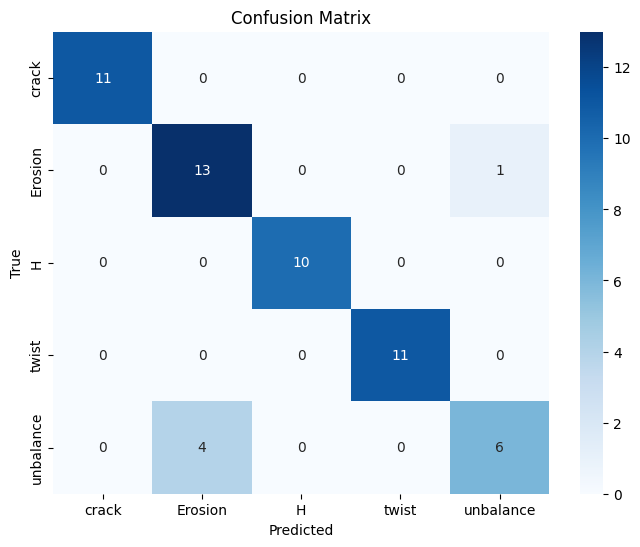

In [27]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['crack', 'Erosion', 'H', 'twist', 'unbalance'], 
            yticklabels=['crack', 'Erosion', 'H', 'twist', 'unbalance'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Thử với C = 100

In [28]:
# Khởi tạo mô hình SVC
svc_model_C_10 = SVC(kernel='rbf' ,gamma = 'scale' ,C=100, random_state=42)

# Huấn luyện mô hình
svc_model_C_10.fit(X_train, Y_train)

SVC(C=100, random_state=42)

In [29]:
# Dự đoán trên tập kiểm tra
Y_pred = svc_model_C_10.predict(X_test)

In [30]:
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Tính độ chính xác
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9821


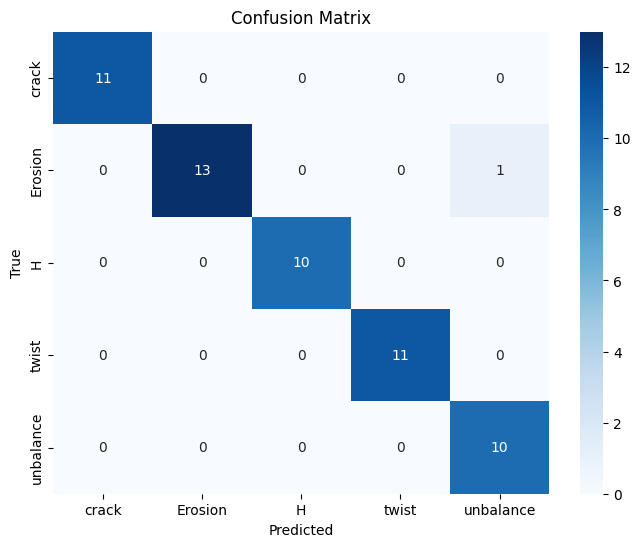

In [31]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['crack', 'Erosion', 'H', 'twist', 'unbalance'], 
            yticklabels=['crack', 'Erosion', 'H', 'twist', 'unbalance'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()